<a href="https://colab.research.google.com/github/reza-nugraha32/data-sciences-lab/blob/main/seleksi_dsa_compfest15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Data Banjir DKI Jakarta**
*by Georhapsody | Submisi Data Science Academy Compfest 15*

# **Daftar Isi**

1.   [Pendahuluan](#scrollTo=BmrXpHtMnOSS)
2.   [Rumusan Masalah](#scrollTo=BmrXpHtMnOSS)
3.   [Hipotesis](#scrollTo=BmrXpHtMnOSS)
4.   [Metodologi](#scrollTo=WzZPohJ1ylWD)
5.   [Data Preparation](#scrollTo=HsLYzmkG1lvL)
5.   [Data Profiling](#scrollTo=pL3OUuGM1Glw)
7.   [Data Cleansing](#scrollTo=ELNhMnU82PLQ)
8.   [Feature Engineering](#scrollTo=8Ot-aY8T5KR6)
9.   [Exploratory Data Analysis](#scrollTo=M4imfj_t57f2)
10.  [Analisis Lanjutan](#scrollTo=3ab9wSvF6JWP)
11.  [Kesimpulan dan Rekomendasi](#scrollTo=FTwWaJhL6Uyv)

# **Pendahuluan**
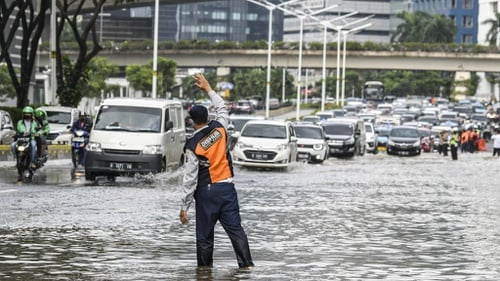

Banjir adalah problematika lama yang melanda DKI Jakarta serta kota-kota besar di Indonesia setiap tahunnya. Kerugian material, korban jiwa, masalah kesehatan, ekonomi, serta mobilitas menjadi dampak yang dibawa oleh datangnya banjir. Diperlukan analisis terhadap data-data banjir di DKI Jakarta untuk memeroleh *insight* serta mengenali pola dan tren data tersebut untuk membangun pengetahuan dalam menghadapi problematika ini.

# **Rumusan Masalah**
Dalam menganalisis data-data ini, kami merumuskan beberapa masalah sebagai berikut.

1.   Bagaimana pola serta tren banjir di DKI Jakarta tiap tahunnya?
2.   Bagaimana pola serta tren banjir di DKI Jakarta tiap bulannya?
3.   Bagaimana hubungan antarvariabel yang memengaruhi banjir serta pengaruhnya terhadap masyarakat DKI Jakarta?
4.   Bagaimana hubungan pola curah hujan dengan pola banjir di DKI Jakarta?
5.   Bagaimana pengaruh banjir terhadap kesehatan masyarakat di DKI Jakarta?

# **Hipotesis**
1.   Pola banjir di DKI Jakarta pada tahun 2015-2020 mengalami peningkatan.
2.   Pola jumlah kecamatan dan kelurahan yang terdampak banjir memiliki pengaruh yang kuat terhadap jumlah jiwa penduduk yang terdampak banjir.
3.   Pola banjir di DKI Jakarta dapat diprediksi oleh pola curah hujan.
4.   Pola banjir memiliki pengaruh yang kuat terhadap pola penyebaran penyakit menular di DKI Jakarta.


# **Metodologi**

Dalam menentukan hubungan antarvariabel serta menentukan pola dalam *dataset*, akan digunakan analisis statistik. Untuk menemukan hubungan antarvariabel dilakukan *correlation analysis* kemudian dilakukan regresi linier untuk mendapatkan *regression score* atau nilai $R^2$-nya antara kedua variabel yang dianalisis. Kedua variabel sebelumnya telah dinormalisasi terlebih dahulu agar nilai *regression score*-nya dapat digunakan untuk analisis tersebut. Nilai terbaik untuk *regression score* adalah 1.0 dan dapat bernilai negatif. Untuk menentukan pola serta prediksi pada dataset, dilakukan *polynomial regression* dengan orde polinomial yang sesuai dengan pola variabel yang ada.


# **Data Preparation**
Pada analisis ini digunakan *dataset* data rekap banjir DKI Jakarta tahun 2015-2020 [1] . Selain itu, digunakan dua dataset tambahan untuk analisis data curah hujan DKI Jakarta tahun 2018-2020 [2], serta analisis data angka penyakit menular DKI Jakarta tahun 2015-2020 [3].

Kedua *dataset* tambahan tersebut telah diproses terlebih dahulu sehingga dapat disajikan dalam bentuk .csv dan dapat dianalisis. *Dataset* yang telah diproses dapat diakses di https://github.com/reza-nugraha32/data-sciences-lab/tree/main/dataset-compfest.

Seluruh dataset kemudian dimuat ke dalam *notebook* sebagai *dataframe*.


1.   https://data.jakarta.go.id/dataset?q=banjir
2.   https://https://jakarta.bps.go.id/indicator/151/373/2/curah-hujan-di-stasiun-kemayoran-menurut-bulan.html
3.   https://data.jakarta.go.id/dataset/data-jumlah-penderita-penyakit-menular-menurut-jenis-penyakit-di-provinsi-dki-jakarta

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import data rekap banjir tahun 2015-2020
data_2015 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2015.csv",
                        na_values="n.a", keep_default_na=False)
data_2016 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2016.csv",
                        na_values="n.a", keep_default_na=False)
data_2017 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2017.csv",
                        na_values="n.a", keep_default_na=False)
data_2018 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2018.csv",
                        na_values="n.a", keep_default_na=False)
data_2019 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2019.csv",
                        na_values="n.a", keep_default_na=False)
data_2020 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2020.csv",
                        na_values="n.a", keep_default_na=False)

# Import data curah hujan DKI Jakarta 2018-2020
data_hujan = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-curah-hujan.csv")

# Import data penyakit menular
data_penyakit = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-jumlah-penderita-penyakit-menular.csv")

*Dataset* banjir kemudian di-merge ke dalam satu *dataframe* *data_rekap*.

In [ ]:
# Data kolom tahun untuk melabeli data tiap tahun
data_2015.insert(loc=0, column="tahun", value=[2015 for i in range(len(data_2015))])
data_2016.insert(loc=0, column="tahun", value=[2016 for i in range(len(data_2016))])
data_2017.insert(loc=0, column="tahun", value=[2017 for i in range(len(data_2017))])
data_2018.insert(loc=0, column="tahun", value=[2018 for i in range(len(data_2018))])
data_2019.insert(loc=0, column="tahun", value=[2019 for i in range(len(data_2019))])
data_2020.insert(loc=0, column="tahun", value=[2020 for i in range(len(data_2020))])

# Inisialisasi list dataset
list_data = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020]

# Inisialisasi dataframe dataset
data_rekap = pd.concat(list_data, axis=0, ignore_index=True)

# Dimensi dataset
print(data_rekap.shape)

(71, 16)


Selanjutnya, dilakukan peninjauan awal pada data.

In [ ]:
# Cetak 5 data pertama pada dataset
data_rekap.head()

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_pengungsi,jumlah_tempat_pengungsian,jumlah_nilai_kerugian
0,2015,1,15,36,10-150,2,221,6095.0,13073.0,0,0,0,0,3255,59,0.0
1,2015,2,38,133,10-200,7,615,64458.0,231566.0,5,0,0,0,41202,337,0.0
2,2015,3,12,15,10-200,4,30,2869.0,8119.0,0,0,0,0,822,5,0.0
3,2015,4,4,6,20-100,3,18,2235.0,7905.0,0,0,0,0,0,0,0.0
4,2015,5,1,1,20-100,1,7,423.0,2088.0,0,0,0,0,0,0,0.0



# **Data Profiling**
Dilakukan *data profiling* untuk peninjauan lanjut pada data, berupa deskripsi statistik, tipe-tipe data dalam *dataset*, pengecekan *missing value*, serta pengecekan duplikasi data. Selain itu, dilakukan pula pengecekan *outlier* pada data.

In [ ]:
# Deskripsi statistik
data_rekap.describe()

,tahun,bulan,kecamatan,kelurahan,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_pengungsi,jumlah_tempat_pengungsian,jumlah_nilai_kerugian
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,68.000000,67.000000,71.000000,71.0,71.000000,71.0,71.000000,71.000000,23.0
mean,2017.521127,6.422535,11.126761,24.154930,1.591549,68.760563,3307.911765,11352.492537,0.577465,0.0,0.014085,0.0,1888.422535,16.873239,0.0
std,1.722616,3.437865,9.751087,32.050696,1.293693,113.043919,8792.731635,31477.836655,2.516585,0.0,0.118678,0.0,6850.383815,53.053862,0.0
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
25%,2016.000000,3.500000,4.000000,5.000000,1.000000,13.000000,11.250000,160.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
50%,2018.000000,6.000000,10.000000,15.000000,1.000000,30.000000,406.000000,1601.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
75%,2019.000000,9.000000,16.000000,31.000000,2.000000,79.000000,2393.500000,8093.500000,0.000000,0.0,0.000000,0.0,402.500000,6.500000,0.0
max,2020.000000,12.000000,42.000000,167.000000,7.000000,615.000000,64458.000000,231566.000000,19.000000,0.0,1.000000,0.0,41202.000000,337.000000,0.0


In [ ]:
# Deskripsi statistik
data_hujan.describe()

,tahun,bulan,curah
count,36.000000,36.00000,36.000000
mean,2019.000000,6.50000,162.611111
std,0.828079,3.50102,206.006520
min,2018.000000,1.00000,0.000000
25%,2018.000000,3.75000,22.600000
50%,2019.000000,6.50000,117.400000
75%,2020.000000,9.25000,210.000000
max,2020.000000,12.00000,1043.200000


In [ ]:
# Deskripsi statistik
data_penyakit.describe()

,tahun,jumlah_penderita
count,216.000000,216.000000
mean,2017.500000,1607.620370
std,1.711792,2816.531605
min,2015.000000,0.000000
25%,2016.000000,1.750000
50%,2017.500000,42.500000
75%,2019.000000,2307.000000
max,2020.000000,13167.000000


In [ ]:
# List data types pada dataset
print("Data types data_rekap:")
print(data_rekap.dtypes)
print()

# Cek missing values
print("Check for missing values:")
print(data_rekap.isnull().any())
print()

# Cek duplikasi data
print("Check for duplicates:")
if data_rekap.duplicated().any() == True: print(True)
else : print(False)

Data types data_rekap:
tahun                          int64
bulan                          int64
kecamatan                      int64
kelurahan                      int64
rata_rata_ketinggian_air      object
lama_genangan                  int64
rw_terdampak                   int64
kk_terdampak                 float64
jiwa_terdampak               float64
korban_meninggal               int64
korban_hilang                  int64
korban_luka_berat              int64
korban_luka_ringan             int64
jumlah_pengungsi               int64
jumlah_tempat_pengungsian      int64
jumlah_nilai_kerugian        float64
dtype: object

Check for missing values:
tahun                        False
bulan                        False
kecamatan                    False
kelurahan                    False
rata_rata_ketinggian_air     False
lama_genangan                False
rw_terdampak                 False
kk_terdampak                  True
jiwa_terdampak                True
korban_meninggal             

In [ ]:
# Missing values pada kolom kk_terdampak
ratio_of_missing_values = (len(data_rekap["kk_terdampak"])
                            - data_rekap["kk_terdampak"].count())/len(data_rekap["kk_terdampak"])

percent_of_missing_values = "{0:.1f}%".format(ratio_of_missing_values*100)
print("Percentage of missing values in the column kk_terdampak:", percent_of_missing_values)

# Missing values pada kolom jiwa_terdampak
ratio_of_missing_values = (len(data_rekap["jiwa_terdampak"])
                            - data_rekap["jiwa_terdampak"].count())/len(data_rekap["jiwa_terdampak"])

percent_of_missing_values = "{0:.1f}%".format(ratio_of_missing_values*100)
print("Percentage of missing values in the column jiwa_terdampak:", percent_of_missing_values)

# Missing values pada kolom jumlah_nilai_kerugian
ratio_of_missing_values = (len(data_rekap["jumlah_nilai_kerugian"])
                            - data_rekap["jumlah_nilai_kerugian"].count())/len(data_rekap["jumlah_nilai_kerugian"])

percent_of_missing_values = "{0:.1f}%".format(ratio_of_missing_values*100)
print("Percentage of missing values in the column jumlah_nilai_kerugian:", percent_of_missing_values)

Percentage of missing values in the column kk_terdampak: 4.2%
Percentage of missing values in the column jiwa_terdampak: 5.6%
Percentage of missing values in the column jumlah_nilai_kerugian: 67.6%


In [ ]:
# List data types pada dataset curah hujan
print("Data types data_hujan:")
print(data_hujan.dtypes)
print()

# Cek missing values
print("Check for missing values:")
print(data_hujan.isnull().any())
print()

# Cek duplikasi data
print("Check for duplicates:")
if data_hujan.duplicated().any() == True: print(True)
else : print(False)

Data types data_hujan:
tahun      int64
bulan      int64
curah    float64
dtype: object

Check for missing values:
tahun    False
bulan    False
curah    False
dtype: bool

Check for duplicates:
False


In [ ]:
# List data types pada dataset penyakit menular
print("Data types data_penyakit:")
print(data_penyakit.dtypes)
print()

# Cek missing values
print("Check for missing values:")
print(data_penyakit.isnull().any())
print()

# Cek duplikasi data
print("Check for duplicates:")
if data_penyakit.duplicated().any() == True: print(True)
else : print(False)


Data types data_penyakit:
tahun                int64
wilayah             object
nama_penyakit       object
jumlah_penderita     int64
dtype: object

Check for missing values:
tahun               False
wilayah             False
nama_penyakit       False
jumlah_penderita    False
dtype: bool

Check for duplicates:
False


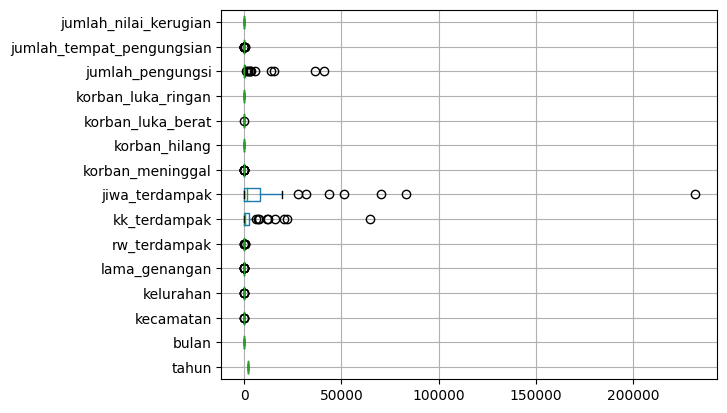

In [ ]:
# Cek ouliers
data_rekap.boxplot(vert=False)
plt.show()

# **Data Cleansing**
*Missing value* pada data_rekap perlu ditangani terlebih dahulu. Untuk variabel *kk_terdampak* serta *kk_terdampak*, *missing value*-nya diisi dengan nilai rata-rata variabelnya. Untuk variabel *jumlah_nilai_kerugian* dihapus dari dataset karena mayoritas nilainya nol. Begitu juga dengan variabel *korban_hilang,	korban_luka_berat*, dan	*korban_luka_ringan*. Selain itu, dilakukan juga penghapusan *outlier* yang dapat memengaruhi hasil analisis data.

In [ ]:
# Drop kolom yang tidak diperlukan
for i in range (len(list_data)):

  # Drop kolom yang tidak diperlukan
  list_data[i] = list_data[i].drop(["jumlah_nilai_kerugian", "korban_hilang", "korban_luka_berat", "korban_luka_ringan"], axis=1)

# Update dataframe dataset
data_rekap = pd.concat(list_data, axis=0, ignore_index=True)

In [ ]:
# Missing Value Handling
for i in range (len(list_data)):

  # Isi missing value kolom dengan mean
  list_data[i]["kk_terdampak"].fillna(list_data[i]["kk_terdampak"].mean(), inplace=True)
  list_data[i]["jiwa_terdampak"].fillna(list_data[i]["jiwa_terdampak"].mean(), inplace=True)

# Update dataframe dataset
data_rekap = pd.concat(list_data, axis=0, ignore_index=True)

# Cek missing values pada dataset
print("Check for missing values:")
print(data_rekap.isnull().any())
print()

Check for missing values:
tahun                        False
bulan                        False
kecamatan                    False
kelurahan                    False
rata_rata_ketinggian_air     False
lama_genangan                False
rw_terdampak                 False
kk_terdampak                 False
jiwa_terdampak               False
korban_meninggal             False
jumlah_pengungsi             False
jumlah_tempat_pengungsian    False
dtype: bool



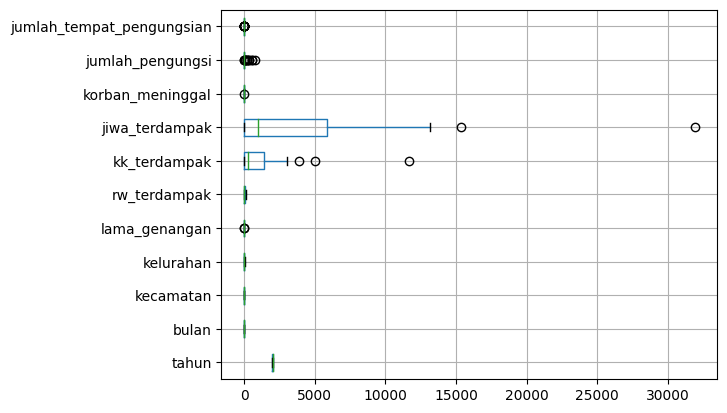

In [ ]:
# Outlier Handling
for i in range (len(list_data)):

  # Q1, Q3, dan IQR untuk kolom jiwa_terdampak
  Q1 = list_data[i]["jiwa_terdampak"].quantile(0.25)
  Q3 = list_data[i]["jiwa_terdampak"].quantile(0.75)
  IQR = Q3 - Q1

  list_data[i] = list_data[i][~((list_data[i]["jiwa_terdampak"] < (Q1 - 1.5*IQR)) | (list_data[i]["jiwa_terdampak"] > (Q3 + 1.5*IQR)))]

  # Q1, Q3, dan IQR untuk kolom kk_terdampak
  Q1 = list_data[i]["kk_terdampak"].quantile(0.25)
  Q3 = list_data[i]["kk_terdampak"].quantile(0.75)
  IQR = Q3 - Q1

  list_data[i] = list_data[i][~((list_data[i]["kk_terdampak"] < (Q1 - 1.5*IQR)) | (list_data[i]["kk_terdampak"] > (Q3 + 1.5*IQR)))]

  # Q1, Q3, dan IQR untuk kolom jumlah_pengungsi
  Q1 = list_data[i]["jumlah_pengungsi"].quantile(0.25)
  Q3 = list_data[i]["jumlah_pengungsi"].quantile(0.75)
  IQR = Q3 - Q1

  list_data[i] = list_data[i][~((list_data[i]["jumlah_pengungsi"] < (Q1 - 1.5*IQR)) | (list_data[i]["jumlah_pengungsi"] > (Q3 + 1.5*IQR)))]

# Update dataframe dataset
data_rekap = pd.concat(list_data, axis=0, ignore_index=True)

# Boxplot
data_rekap.boxplot(vert=False)
plt.show()

# **Feature Engineering**
Pertama, kolom *kecamatan* dan *kelurahan* dijadikan satu jumlahnya karena kedua variabel ini sama-sama menyatakan variabel spasial terhadap banjir.

In [ ]:
# Inisiasi list kecamatan_dan_kelurahan untuk menyimpan sum kedua kolomnya
kecamatan_dan_kelurahan = []

for i in range(len(data_rekap)):
  kecamatan_dan_kelurahan.append(int(data_rekap.iloc[i, 2])+int(data_rekap.iloc[i, 3]))

# Drop kolom kecamatan dan kelurahan
data_rekap = data_rekap.drop(["kecamatan", "kelurahan"], axis=1)

# Insert kolom sum keduanya
data_rekap.insert(loc=3, column="kecamatan_dan_kelurahan", value=kecamatan_dan_kelurahan)

Kolom rw_terdampak juga dapat dihapus, karena variabel ini tidak terlalu berpengaruh dengan adanya variabel seperti kk_terdampak yang lebih akurat merepresentasikan jumlah penduduk yang terdampak oleh banjir.

In [ ]:
data_rekap = data_rekap.drop("rw_terdampak", axis=1)

Kolom rata_rata_ketinggian_air dapat dikurangi kategorinya menjadi empat, yaitu 0, 5-170, 10-200, dan 20-300. Oleh karena itu, menggunakan operasi string slicing, kita akan mengubah kategori setiap elemennya ke dalam empat kategori tersebut.

In [ ]:
for i in range(len(data_rekap)):
  if data_rekap.iloc[i, 2] != "0":

    if int(data_rekap.iloc[i, 2][0:2]) <= 5 :
      data_rekap.iloc[i, 2] = "5-170"

    elif int(data_rekap.iloc[i, 2][0:2]) <= 10:
      data_rekap.iloc[i, 2] = "10-200"

    elif int(data_rekap.iloc[i, 2][0:2]) <= 20:
      data_rekap.iloc[i, 2] = "20-300"

In [ ]:
data_rekap.groupby("rata_rata_ketinggian_air").count()

,tahun,bulan,kecamatan_dan_kelurahan,lama_genangan,kk_terdampak,jiwa_terdampak,korban_meninggal,jumlah_pengungsi,jumlah_tempat_pengungsian
rata_rata_ketinggian_air,,,,,,,,,
0,13,13,13,13,13,13,13,13,13
10-200,26,26,26,26,26,26,26,26,26
20-300,5,5,5,5,5,5,5,5,5
5-170,9,9,9,9,9,9,9,9,9


Selanjutnya, dilakukan normalisasi min-max pada setiap variabel selain tahun, bulan, dan rata_rata_ketinggian air agar nilai $R^2$ yang diperoleh dari *regression score* antara kedua variabel data dapat digunakan sebagai indikator korelasi keduanya.

In [ ]:
# Normalisasi data dengan Min-Max scaler
# Pisahkan features numerik dari dataset
data_norm = data_rekap.copy()

# Hapus data kontinu
data_norm = data_norm.drop("rata_rata_ketinggian_air", axis=1)
array = data_norm.values
X = array[:, 2:len(data_rekap.columns)]

# Inisiasi kolom data normalisasi
data_norm_col = data_norm.columns.to_list()
data_norm_col.remove("tahun")
data_norm_col.remove("bulan")

# Inisiasi Min-Max scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

# Transformasi Min-Max scaler
data = min_max_scaler.fit_transform(X)
data_norm = pd.DataFrame(data, columns=data_norm_col)
data_norm.insert(loc=0, column="tahun", value=data_rekap["tahun"].values)
data_norm.insert(loc=1, column="bulan", value=data_rekap["bulan"].values)
print("Normalized dataset :")
data_norm.head(10)

Normalized dataset :


,tahun,bulan,kecamatan_dan_kelurahan,lama_genangan,kk_terdampak,jiwa_terdampak,korban_meninggal,jumlah_pengungsi,jumlah_tempat_pengungsian
0,2015,4,0.140845,0.75,0.191500,0.247643,0.0,0.000000,0.000000
1,2015,5,0.028169,0.25,0.036244,0.065411,0.0,0.000000,0.000000
2,2015,6,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000
3,2015,7,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000
4,2015,8,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000
5,2015,9,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000
6,2015,10,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000
7,2015,11,0.253521,1.00,0.330563,0.413364,0.0,0.711052,0.888889
8,2015,12,0.380282,1.00,0.145489,0.193979,0.0,0.000000,0.000000
9,2016,1,0.295775,0.50,0.087396,0.120704,0.0,0.000000,0.000000


Selanjutnya, deklarasikan fungsi *corr* untuk menghitung dan mencetak nilai korelasi antara dua variabel data.

In [ ]:
# Hubungan antara variabel spasial dengan variabel jumlah
# Nilai korelasi antara dua variabel
def corr(a, b):
  print("Correlation between", a, "and", b)
  print(data_norm[[a, b]].corr())
  plt.plot(data_norm[a], data_norm[b], "o")
  plt.xlabel(a)
  plt.ylabel(b)
  plt.show()

Deklarasikan pula fungsi *lin_reg* untuk membangun model regresi linier antara dua variabel. Pada kedua variabel diberikan perlakuan *train-test split* dengan rasio 75%:25% untuk melatih model regresi. Kemudian, dilakukan *fitting* pada model untuk menghasilkan prediksi.

In [ ]:
# Regresi linier antara dua variabel
def lin_reg(a, b):
  # Inisiasi array data
  x = np.array(data_norm[a]).reshape(-1, 1)
  y = np.array(data_norm[b]).reshape(-1, 1)

  # Split data menjadi data training & test
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

  # Model polynomial regression
  lin_reg_model = LinearRegression().fit(x_train,y_train)
  y_pred = lin_reg_model.predict(x_test)

  # Cetak score regresi
  print("Regression score: ", lin_reg_model.score(x_test, y_test))

  # Plot regresi
  plt.scatter(x_test, y_test)
  plt.plot(x_test, y_pred, color ='k')
  plt.xlabel(a)
  plt.ylabel(b)
  plt.show()
  print()

Selain itu, kita ingin membandingkan variabel curah hujan dengan variabel lama_genangan dan jiwa_terdampak. Data curah hujan yang tersedia hanya terdapat pada tahun 2018-2020, sehingga kita harus membuat *dataframe* baru yang hanya terdiri dari data 2018-2020 untuk kemudian keduanya di-*merge*. Dataframe baru ini kemudian dinormalisasi. Perlakuan yang sama diterapkan juga untuk dataset penyakit.

In [ ]:
# Pisahkan data 2018-2020 dari dataset
tahun = []
bulan = []
lama_genangan = []
jiwa_terdampak = []

# Mencari index data untuk tahun 2018
for i in range(len(data_rekap)):
  if data_rekap.iloc[i, 0] == 2018:
    start = i

# Append list
for i in range(start, len(data_rekap)):
  tahun.append(data_rekap.iloc[i, 0])
  bulan.append(data_rekap.iloc[i, 1])
  lama_genangan.append(data_rekap.iloc[i, 5])
  jiwa_terdampak.append(data_rekap.iloc[i, 8])

# Inisiasi dataframe temp untuk merge pada dataframe penyakit
df1 = pd.DataFrame(bulan, columns=["bulan"])
df2 = pd.DataFrame(lama_genangan, columns=["lama_genangan"])
df3 = pd.DataFrame(jiwa_terdampak, columns=["jiwa_terdampak"])
df_temp_1 = pd.concat([df1, df2, df3], axis=1)

# Merge dataframe dan fill missing value dengan nol
df_hujan = pd.merge(data_hujan, df_temp_1, on = "bulan")
df_hujan.fillna(0)

# Normalisasi data dengan Min-Max scaler
# Pisahkan features numerik dari dataset
df_hujan_norm = df_hujan.copy()
array = df_hujan_norm.values
X = array[:, 2:len(df_hujan_norm.columns)]

# Inisiasi kolom data normalisasi
df_hujan_norm_col = df_hujan_norm.columns.to_list()
df_hujan_norm_col.remove("tahun")
df_hujan_norm_col.remove("bulan")

# Inisiasi Min-Max scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

# Transformasi Min-Max scaler
data = min_max_scaler.fit_transform(X)
df_hujan_norm = pd.DataFrame(data, columns=df_hujan_norm_col)
df_hujan_norm.insert(loc=0, column="tahun", value=df_hujan["tahun"].values)
df_hujan_norm.insert(loc=1, column="bulan", value=df_hujan["bulan"].values)
print("Normalized dataset :")
df_hujan_norm.head()

Normalized dataset :


,tahun,bulan,curah,lama_genangan,jiwa_terdampak
0,2018,1,0.206192,0.127479,0.0
1,2019,1,0.368002,0.127479,0.0
2,2020,1,0.592408,0.127479,0.0
3,2018,2,0.413344,0.375826,0.0
4,2019,2,0.258915,0.375826,0.0


In [ ]:
# Dataframe penyakit
# Inisiasi dataframe
df1 = pd.DataFrame(tahun, columns=["tahun"])
df2 = pd.DataFrame(lama_genangan, columns=["lama_genangan"])
df3 = pd.DataFrame(jiwa_terdampak, columns=["jiwa_terdampak"])
df_temp_2 = pd.concat([df1, df2, df3], axis=1)

# Merge dataframe dan fill missing value dengan nol
df_penyakit = pd.merge(data_penyakit, df_temp_2, on = "tahun")
df_penyakit.fillna(df_penyakit.mean())

# Normalisasi data dengan Min-Max scaler
# Pisahkan features numerik dari dataset
df_penyakit_norm = df_penyakit.copy()
array = df_penyakit_norm.values
X = array[:, 3:len(df_penyakit.columns)]

# Inisiasi kolom data normalisasi
df_penyakit_norm_col = df_penyakit_norm.columns.to_list()
df_penyakit_norm_col.remove("tahun")
df_penyakit_norm_col.remove("wilayah")
df_penyakit_norm_col.remove("nama_penyakit")

# Inisiasi Min-Max scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

# Transformasi Min-Max scaler
data = min_max_scaler.fit_transform(X)
df_penyakit_norm = pd.DataFrame(data, columns=df_penyakit_norm_col)
df_penyakit_norm.insert(loc=0, column="tahun", value=df_penyakit["tahun"].values)
df_penyakit_norm.insert(loc=1, column="nama_penyakit", value=df_penyakit["nama_penyakit"].values)
print("Normalized dataset :")
df_penyakit_norm.head()

Normalized dataset :


<ipython-input-180-d2b3a08c70b1>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_penyakit.fillna(df_penyakit.mean())


,tahun,nama_penyakit,jumlah_penderita,lama_genangan,jiwa_terdampak
0,2018,Malaria,0.000000,0.230406,0.0
1,2018,Malaria,0.000811,0.230406,0.0
2,2018,Malaria,0.002270,0.230406,0.0
3,2018,Malaria,0.000568,0.230406,0.0
4,2018,Malaria,0.000811,0.230406,0.0


# **Exploratory Data Analysis**

Dilakukan analisis korelasi variabel serta regresi linier dari data yang sudah dinormalisasi. Nilai korelasi serta *regression score* yang dihasilkan menentukan tingkat hubungan antara dua variabel yang dianalisis.

Pertama, kita membandingkan variabel kecamatan_dan_kelurahan dengan kk_terdampak, jiwa_terdampak, serta jumlah_pengungsi. Kita berekspektasi adanya pengaruh yang kuat antara variabel-variabel ini, di mana banyaknya jumlah kecamatan dan kelurahan yang terdampak banjir proposional dengan banyak penduduk yang terdampak maupun mengungsi.

Pada perbandingan dengan variabel kk_terdampak, didapatkan nilai korelasi dan *regression score* yang rendah. Ini menandakan bahwa **hubungan antara kedua variabel ini rendah**, seperti yang ditunjukan oleh distribusi *scatterplot* antara keduanya yang **tidak membentuk tren**.

Correlation between kecamatan_dan_kelurahan and kk_terdampak
                         kecamatan_dan_kelurahan  kk_terdampak
kecamatan_dan_kelurahan                 1.000000      0.344199
kk_terdampak                            0.344199      1.000000


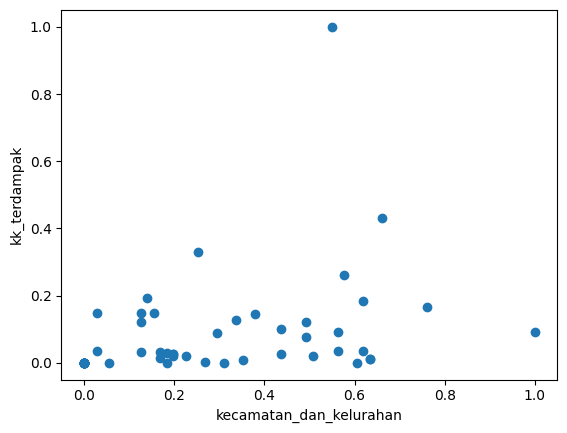

Regression score:  0.00597177571466978


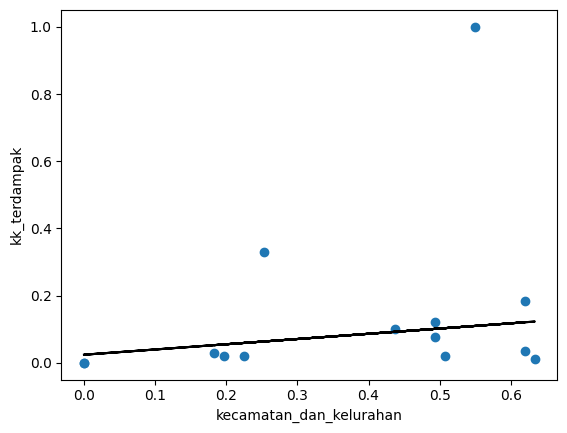

In [ ]:
# Hubungan antara variabel kecamatan_dan_kelurahan dengan kk_terdampak
corr("kecamatan_dan_kelurahan", "kk_terdampak")
lin_reg("kecamatan_dan_kelurahan", "kk_terdampak")

Correlation between kecamatan_dan_kelurahan and jiwa_terdampak
                         kecamatan_dan_kelurahan  jiwa_terdampak
kecamatan_dan_kelurahan                 1.000000        0.354786
jiwa_terdampak                          0.354786        1.000000


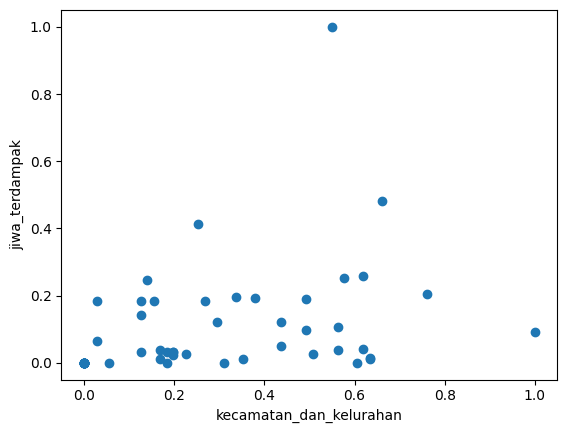

Regression score:  0.09574175586518818


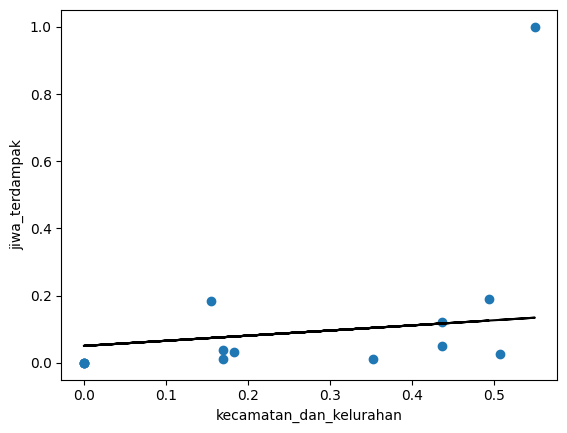

In [ ]:
# Hubungan antara variabel kecamatan_dan_kelurahan dengan jiwa_terdampak
corr("kecamatan_dan_kelurahan", "jiwa_terdampak")
lin_reg("kecamatan_dan_kelurahan", "jiwa_terdampak")

Correlation between kecamatan_dan_kelurahan and jumlah_pengungsi
                         kecamatan_dan_kelurahan  jumlah_pengungsi
kecamatan_dan_kelurahan                 1.000000          0.453941
jumlah_pengungsi                        0.453941          1.000000


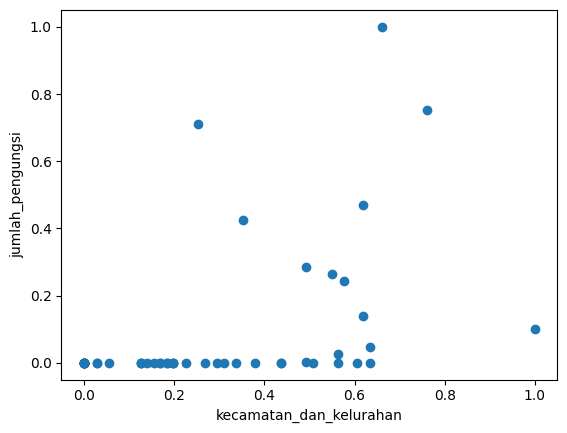

Regression score:  0.19947138479252102


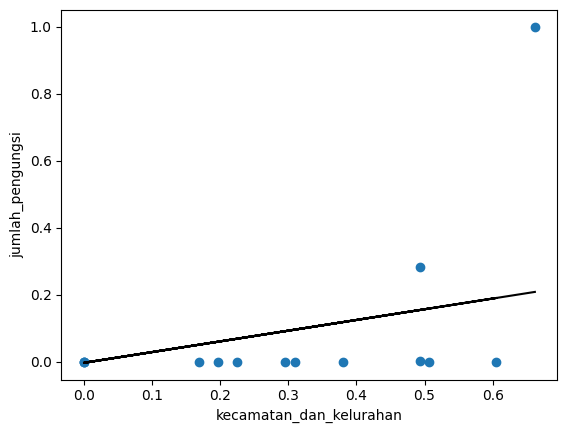

In [ ]:
# Hubungan antara variabel kecamatan_dan_kelurahan dengan jumlah_pengungsi
corr("kecamatan_dan_kelurahan", "jumlah_pengungsi")
lin_reg("kecamatan_dan_kelurahan", "jumlah_pengungsi")

Sama halnya dengan variabel jiwa_terdampak serta variabel jumlah pengungsi.

**Analisis :** Pengaruh antara variabel kecamatan_dan_kelurahan dengan ketiga variabel tersebut rendah, sehingga **hipotesis kedua ditolak**, yaitu jumlah kelurahan dan kecamatan yang terdampak memiliki pengaruh yang kuat terhadap jumlah penduduk yang terdampak. Maka, masih banyak faktor lain yang berpengaruh kuat dalam distribusi jumlah penduduk yang terdampak oleh banjir.

Ketidakmerataan penduduk pada masing-masing kecamatan dan kelurahan dapat menjelaskan rendahnya pengaruh variabel ini.

Correlation between jiwa_terdampak and korban_meninggal
                  jiwa_terdampak  korban_meninggal
jiwa_terdampak           1.00000           0.75597
korban_meninggal         0.75597           1.00000


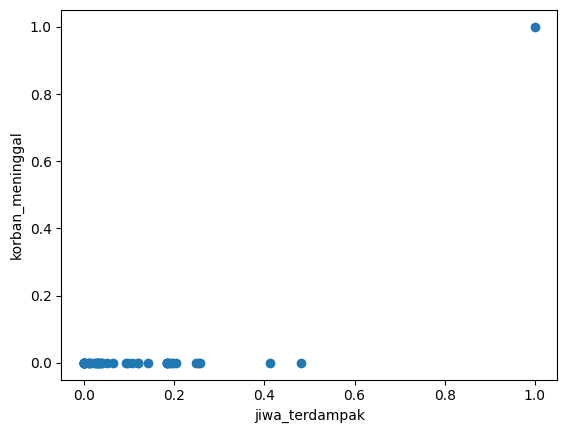

Regression score:  0.0


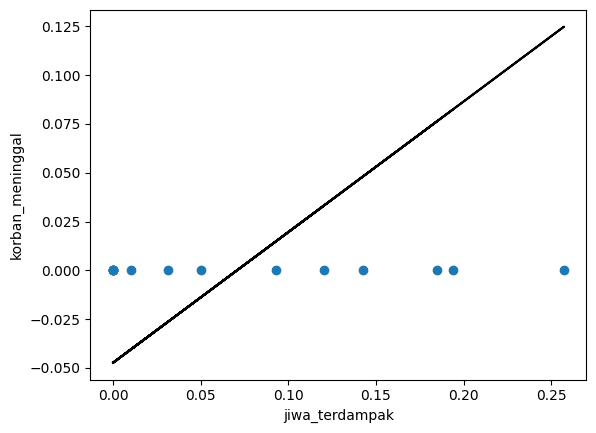

In [ ]:
# Hubungan antara variabel jiwa_terdampak dengan korban_meninggal
corr("jiwa_terdampak", "korban_meninggal")
lin_reg("jiwa_terdampak", "korban_meninggal")

Kita juga mendapatkan hubungan antara jumlah penduduk yang terdampak banjir dengan korban meninggal yang kuat, namun dengan *regression score* yang rendah.

**Analisis :** Kita dapat menyimpulkan secara logis bahwa semakin banyak penduduk yang terdampak oleh banjir, semakin besar pula kemungkinan jatuhnya korban jiwa (akibat tenggelam, terseret arus, terkena sengatan listrik, dan lain-lain). Namun, rasio antara keduanya sangat kecil sehingga kita akan mengharapkan angka yang sangat besar untuk banjir memakan korban jiwa. Kita dapat mengharapkan angka nol untuk korban meninggal pada kasus banjir biasa.

Correlation between jiwa_terdampak and jumlah_pengungsi
                  jiwa_terdampak  jumlah_pengungsi
jiwa_terdampak          1.000000          0.530869
jumlah_pengungsi        0.530869          1.000000


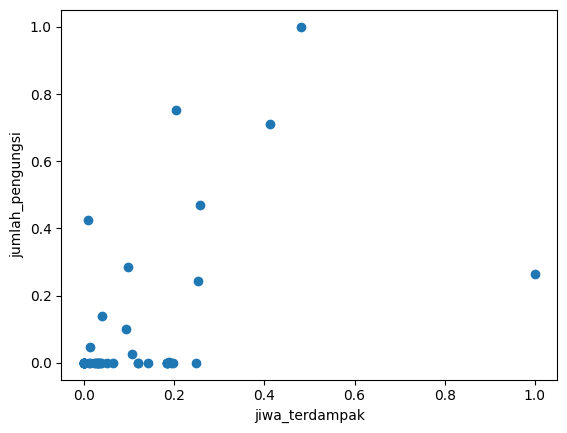

Regression score:  0.21766713906242963


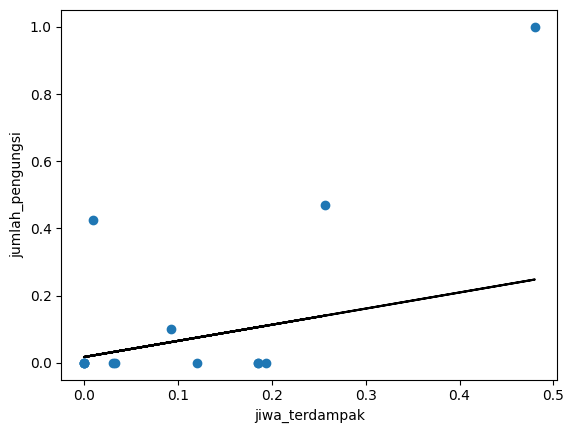

In [ ]:
# Hubungan antara variabel jiwa_terdampak dengan jumlah_pengungsi
corr("jiwa_terdampak", "jumlah_pengungsi")
lin_reg("jiwa_terdampak", "jumlah_pengungsi")

**Analisis :** Terdapat hubungan yang tidak terlalu kuat antara variabel jiwa_terdampak dengan jumlah_pengungsi. Ini dapat menggambarkan keadaan mobilitas penduduk, di mana hanya setengahnya yang terkena dampak banjir yang cukup parah sehingga harus mengungsi.

Correlation between lama_genangan and jumlah_pengungsi
                  lama_genangan  jumlah_pengungsi
lama_genangan          1.000000          0.387112
jumlah_pengungsi       0.387112          1.000000


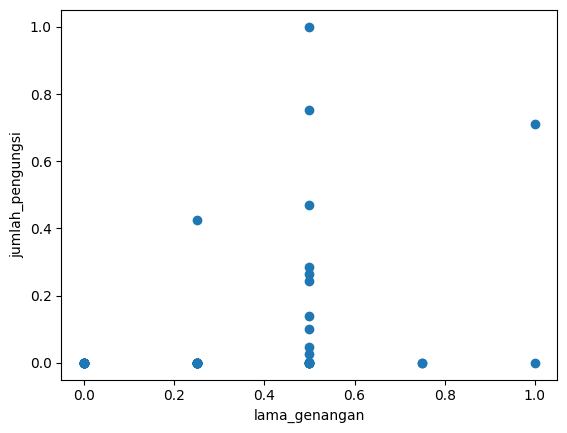

Regression score:  0.056704461373414006


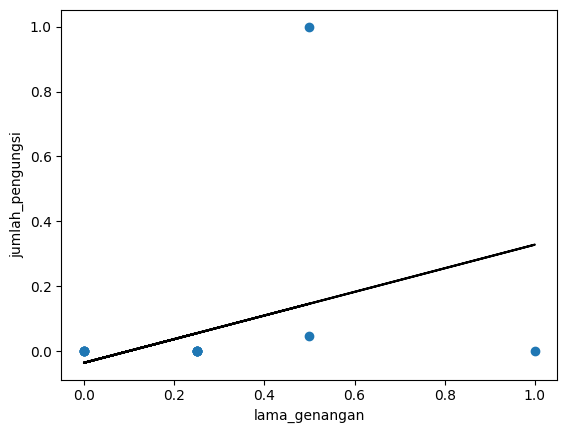

In [ ]:
# Hubungan antara lama_genangan dengan jumlah_pengungsi
corr("lama_genangan", "jumlah_pengungsi")
lin_reg("lama_genangan", "jumlah_pengungsi")

**Analisis :** Lama genangan banjir, seperti yang dapat kita harapkan, tidak terlalu memengaruhi preferensi penduduk yang terdampak untuk mengungsi, terutama jika banjir di daerah tinggalnya tidak terlalu tinggi.

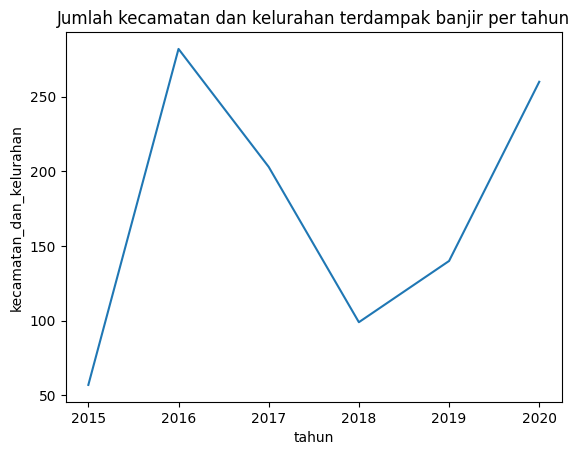

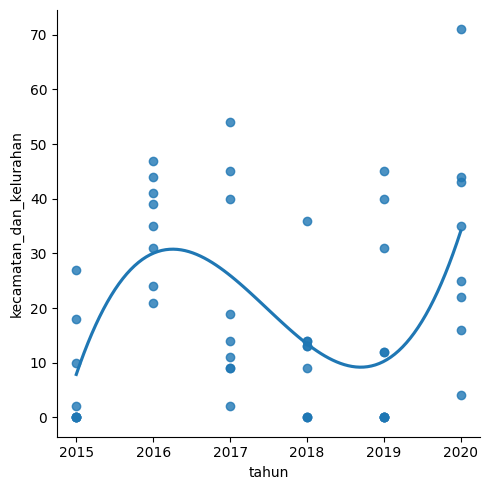

In [ ]:
# Jumlah kecamatan dan kelurahan terdampak banjir per tahun
year = [2015, 2016, 2017, 2018, 2019, 2020]
plt.plot(year, data_rekap.groupby("tahun")["kecamatan_dan_kelurahan"].sum())
plt.title("Jumlah kecamatan dan kelurahan terdampak banjir per tahun")
plt.xlabel("tahun")
plt.ylabel("kecamatan_dan_kelurahan")
plt.show()

# Linear model plot
sns.lmplot(data=data_rekap, x="tahun", y="kecamatan_dan_kelurahan", order=3, ci=None)

**Analisis :** Kita mengeplot jumlah agregat kecamatan dan kelurahan yang terdampak banjir dari tahun 2015-2020. Seperti yang ditunjukkan oleh grafik, tren jumlah kecamatan dan kelurahan yang terdampak oleh banjir cenderung meningkat dari tahun 2019-2020. Maka, bisa kita simpulkan jumlah kecamatan dan kelurahan yang terdampak banjir di tahun 2021 juga akan meningkat, dan **hipotesis pertama diterima**.

**Temuan :** Jumlah kecamatan dan kelurahan terendah yang terdampak banjir berada pada tahun 2015. Kemudian memuncak hingga maksimum lokal pada tahun 2018, dan menurun hingga minimum lokal pada tahun 2019. Tren ini mengikuti pola polinomial orde-3 sesuai yang ditunjukan oleh grafik plot linear model di atas.

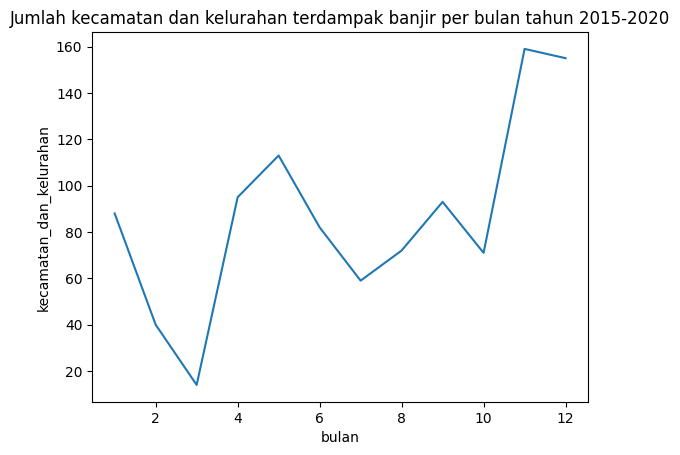

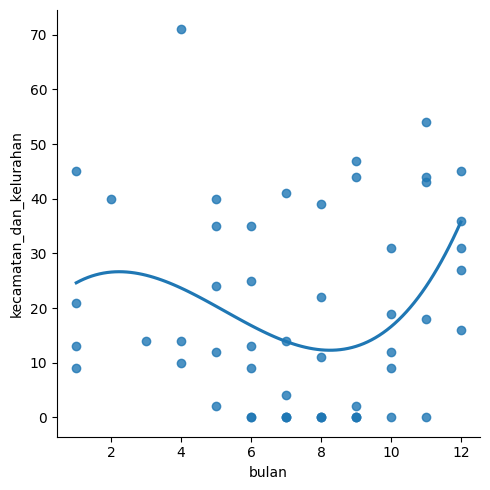

In [ ]:
# Jumlah kecamatan dan kelurahan terdampak banjir per bulan tahun 2015-2020
months = [i for i in range(1, int(len(data_rekap.groupby("bulan")))+1)]

plt.plot(months, data_rekap.groupby("bulan")["kecamatan_dan_kelurahan"].sum(), "-", label = "2015-2020")
plt.title("Jumlah kecamatan dan kelurahan terdampak banjir per bulan tahun 2015-2020")
plt.xlabel("bulan")
plt.ylabel("kecamatan_dan_kelurahan")
plt.show()

# Plot regresi polinomial
sns.lmplot(data=data_rekap, x="bulan", y="kecamatan_dan_kelurahan", order=3, ci=None)

**Analisis :** Kita mengeplot jumlah agregat kecamatan dan kelurahan yang terdampak banjir tiap bulan dari tahun 2015-2020. Seperti yang ditunjukkan oleh grafik, tren grafik cenderung tinggi pada bulan Oktober hingga Desember, serta cenderung rendah pada bulan Januari hingga Maret. Ini sesuai dengan pola musim penghujan di Indonesia yang biasanya dimulai pada bulan Oktober. Selain itu, tren grafik tersebar mengikuti polinomial orde-3, sehingga kita dapat membuat model regresi untuk memprediksi berapa banyak kecamatan dan kelurahan yang terdampak pada bulan tertentu.

**Temuan :** Angka jumlah kecamatan dan kelurahan terdampak banjir terendah berada pada bulan Maret.

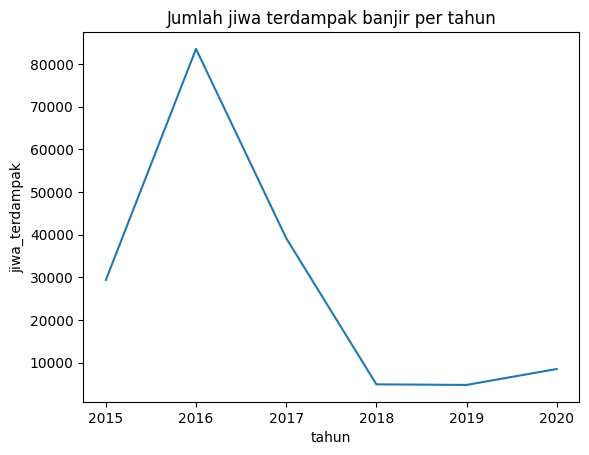

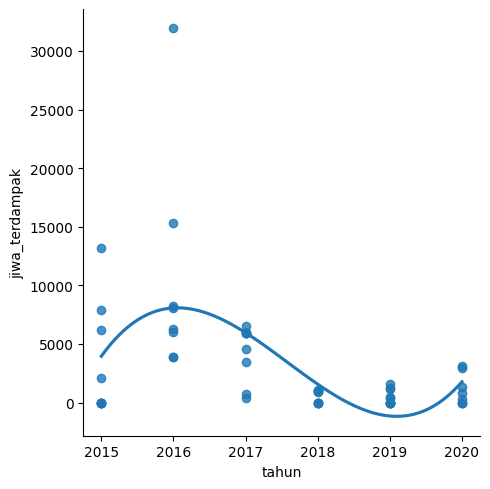

In [ ]:
# Jumlah jiwa terdampak banjir per tahun
plt.plot(year, data_rekap.groupby("tahun")["jiwa_terdampak"].sum())
plt.title("Jumlah jiwa terdampak banjir per tahun")
plt.xlabel("tahun")
plt.ylabel("jiwa_terdampak")
plt.show()

# Linear model plot
sns.lmplot(data=data_rekap, x="tahun", y="jiwa_terdampak", order=3, ci=None)

**Analisis :** Plot jumlah agregat penduduk yang terdampak banjir dari tahun 2015-2020 menunjukan tren yang cenderung meningkat dari tahun 2019-2020. Ini sesuai dengan hipotesis pertama yang telah terbukti sebelumnya.

**Temuan :** Jumlah agregat penduduk yang terdampak banjir yang paling banyak berada pada tahun 2016. Sedangkan yang paling sedikit berada pada tahun 2018-2019.

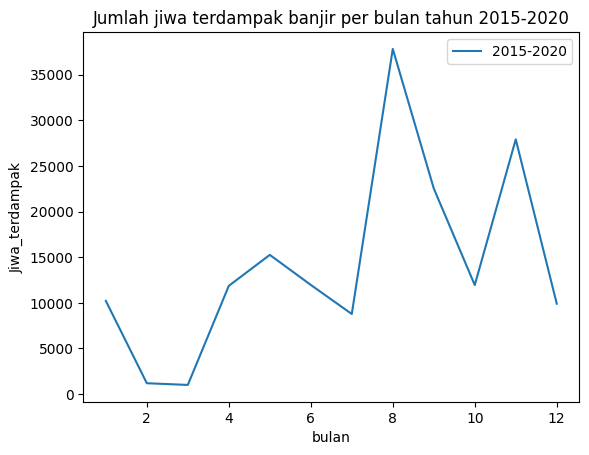

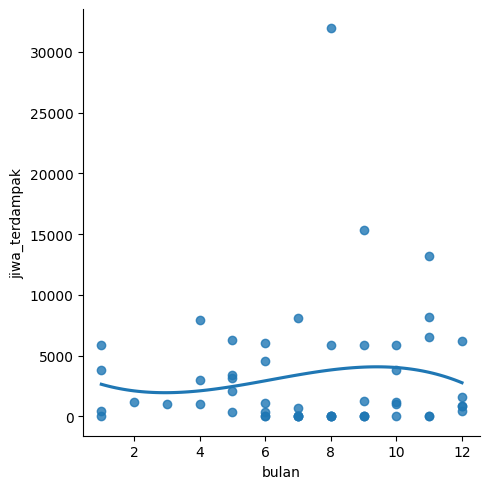

In [ ]:
# Jumlah jiwa terdampak banjir per bulan tahun 2015-2020
plt.plot(months, data_rekap.groupby("bulan")["jiwa_terdampak"].sum(), "-", label = "2015-2020")
plt.legend()
plt.title("Jumlah jiwa terdampak banjir per bulan tahun 2015-2020")
plt.xlabel("bulan")
plt.ylabel("Jiwa_terdampak")
plt.show

# Plot regresi polinomial
sns.lmplot(data=data_rekap, x="bulan", y="jiwa_terdampak", order=3, ci=None)

**Analisis :** Plot jumlah penduduk yang terdampak banjir menunjukkan tren grafik cenderung fluktuatif namun menurun pada pertengahan hingga akhir tahun. Didapatkan bahwa jumlah maksimum terdapat pada bulan Agustus. Selain itu, tren grafik tersebar mengikuti polinomial orde-3, sehingga kita dapat membuat model regresi untuk memprediksi berapa banyak penduduk yang terdampak pada bulan tertentu.

# **Analisis Lanjutan**
Diterapkan model regresi polinomial untuk beberapa variabel dalam data untuk melakukan prediksi. Agar dapat dilakukan *training* pada data, kita lakukan *reshape* terlebih dahulu terhadap matriks data, kemudian lakukan *train-test split*.

Kita lakukan *hyperparameter tuning* untuk memilih orde polinomial regresi dengan melakukan *grid search* terhadap *mean-squared error* pada data kemudian mengambil parameter *best_params_* sebagai ordenya.

Selanjutnya, lakukan *fitting* model terhadap data dan plot hasilnya.

**Analisis :** Model regresi polinomial dengan *hyperparameter tuning* orde polinomial untuk variabel kecamatan_dan_kelurahan dan jiwa_terdampak dengan tahun serta bulan dapat digunakan untuk prediksi jumlah kecamatan dan kelurahan serta penduduk di DKI Jakarta yang terdampak banjir pada bulan serta tahun tertentu.

{'poly__degree': 5}
Regression score:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.00654e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.50263e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.67766e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.60452e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

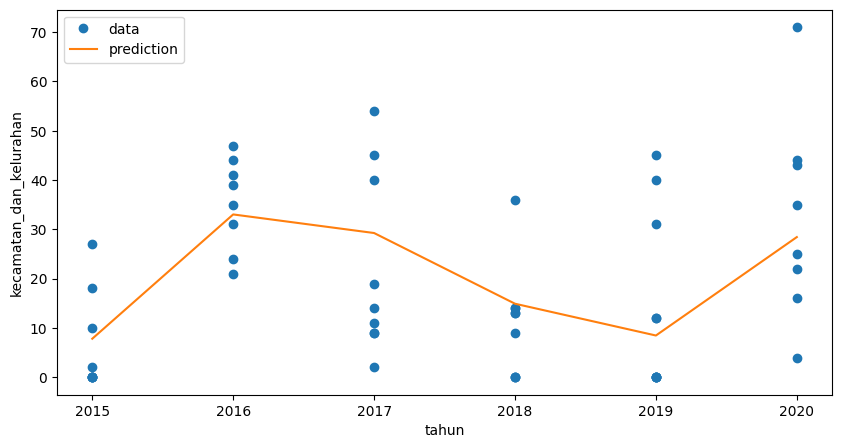

In [ ]:
# Model regresi polinomial jumlah kecamatan dan kelurahan terdampak per tahun
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Reshape data
x = np.array(data_rekap['tahun']).reshape(-1, 1)
y = np.array(data_rekap['kecamatan_dan_kelurahan']).reshape(-1, 1)

# Train-test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Grid search untuk hyperparameter tuning orde polinomial
param_grid = [
    {'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}
  ]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train.reshape(-1, 1), y_train)

print(grid_search.best_params_)

# Model regresi polinomial
model = make_pipeline(PolynomialFeatures(5), Ridge())
model.fit(x_train, y_train)
y_hat = grid_search.predict(x)
fig = plt.figure(figsize=(10,5))

# Cetak score regresi
print("Regression score: ", model.score(x, y_hat))

# Plot regresi
plt.plot(x, y, "o", label="data")
plt.plot(x, y_hat, label="prediction")
plt.xlabel("tahun")
plt.ylabel("kecamatan_dan_kelurahan")
plt.legend(loc="upper left")

{'poly__degree': 3}
Regression score:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.25177e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.24697e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.47386e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.05977e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

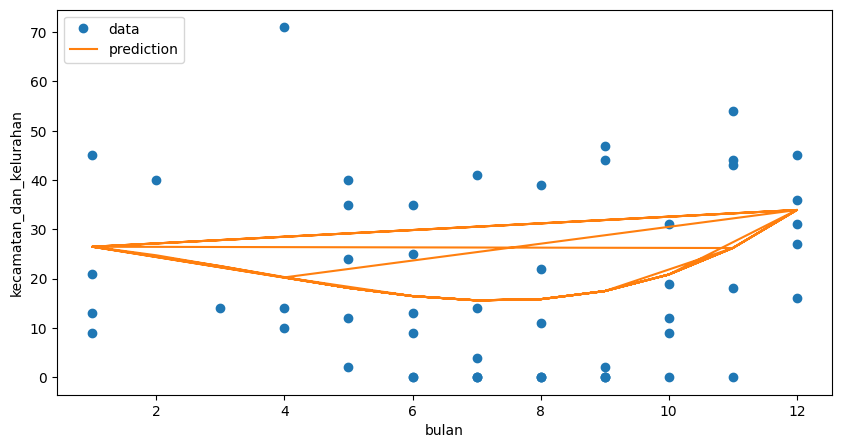

In [ ]:
# Model regresi polinomial jumlah kecamatan dan kelurahan terdampak per bulan
# Reshape data
x = np.array(data_rekap['bulan']).reshape(-1, 1)
y = np.array(data_rekap['kecamatan_dan_kelurahan']).reshape(-1, 1)

# Train-test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Grid search untuk hyperparameter tuning orde polinomial
param_grid = [
    {'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}
  ]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train.reshape(-1, 1), y_train)

print(grid_search.best_params_)

# Model regresi polinomial
model = make_pipeline(PolynomialFeatures(3), Ridge())
model.fit(x_train, y_train)
y_hat = grid_search.predict(x)
fig = plt.figure(figsize=(10,5))

# Cetak score regresi
print("Regression score: ", model.score(x, y_hat))

# Plot regresi
plt.plot(x, y, "o", label="data")
plt.plot(x, y_hat, label="prediction")
plt.xlabel("bulan")
plt.ylabel("kecamatan_dan_kelurahan")
plt.legend(loc="upper left")

{'poly__degree': 5}
Regression score:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.00654e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.50263e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.67766e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.60452e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

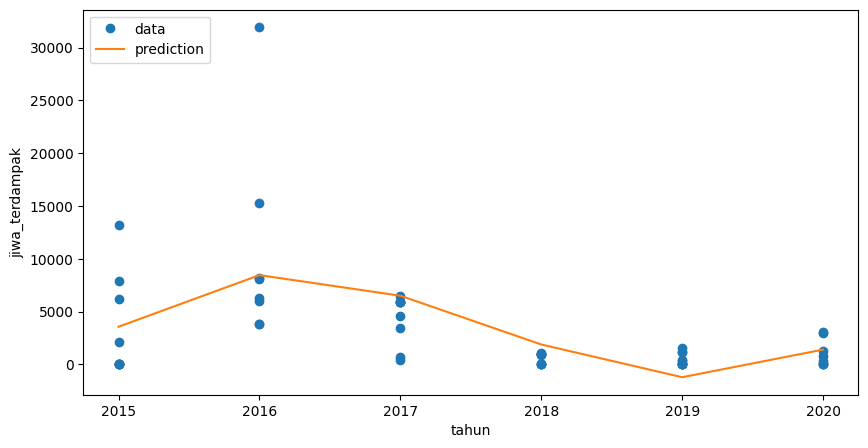

In [ ]:
# Model regresi polinomial jumlah jiwa terdampak per tahun
# Reshape data
x = np.array(data_rekap['tahun']).reshape(-1, 1)
y = np.array(data_rekap['jiwa_terdampak']).reshape(-1, 1)

# Train-test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Grid search untuk hyperparameter tuning orde polinomial
param_grid = [
    {'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}
  ]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train.reshape(-1, 1), y_train)

print(grid_search.best_params_)

# Model regresi polinomial
model = make_pipeline(PolynomialFeatures(5), Ridge())
model.fit(x_train, y_train)
y_hat = grid_search.predict(x)
fig = plt.figure(figsize=(10,5))

# Cetak score regresi
print("Regression score: ", model.score(x, y_hat))

# Plot regresi
plt.plot(x, y, "o", label="data")
plt.plot(x, y_hat, label="prediction")
plt.xlabel("tahun")
plt.ylabel("jiwa_terdampak")
plt.legend(loc="upper left")

{'poly__degree': 2}
Regression score:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.25177e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.24697e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.47386e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.05977e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

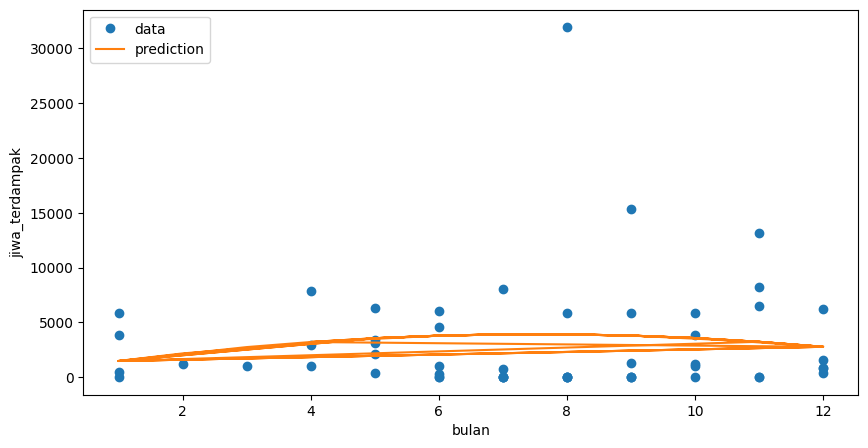

In [ ]:
# Model regresi polinomial jumlah jiwa terdampak per bulan
# Reshape data
x = np.array(data_rekap['bulan']).reshape(-1, 1)
y = np.array(data_rekap['jiwa_terdampak']).reshape(-1, 1)

# Train-test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Grid search untuk hyperparameter tuning orde polinomial
param_grid = [
    {'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}
  ]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train.reshape(-1, 1), y_train)

print(grid_search.best_params_)

# Model regresi polinomial
model = make_pipeline(PolynomialFeatures(2), Ridge())
model.fit(x_train, y_train)
y_hat = grid_search.predict(x)
fig = plt.figure(figsize=(10,5))

# Cetak score regresi
print("Regression score: ", model.score(x, y_hat))

# Plot regresi
plt.plot(x, y, "o", label="data")
plt.plot(x, y_hat, label="prediction")
plt.xlabel("bulan")
plt.ylabel("jiwa_terdampak")
plt.legend(loc="upper left")

**Analisis :** Kita lakukan analisis terhadap pengaruh curah hujan terhadap lama genangan banjir serta jumlah penduduk yang terdampak banjir. Dengan mengeplot ketiga variabel terhadap bulan, didapatkan bahwa ketiga variabel tersebar secara tidak merata tanpa mengikuti pola yang sama. Maka, dapat disimpulkan bahwa **hipotesis ketiga ditolak**.

Hubungan antara curah_hujan dan lama_genangan


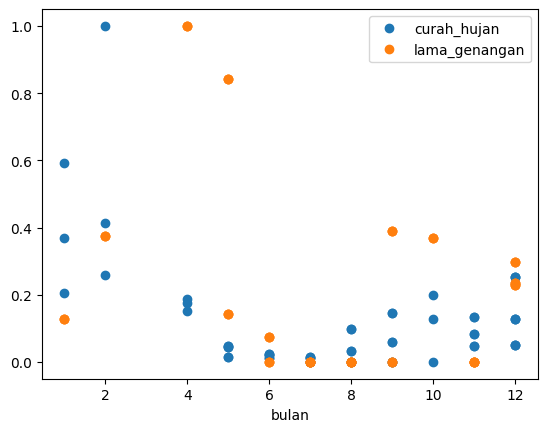

Hubungan antara curah_hujan dan jiwa_terdampak


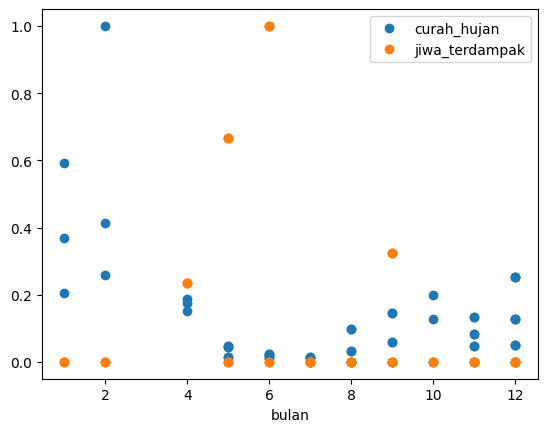

In [ ]:
print("Hubungan antara curah_hujan dan lama_genangan")
plt.plot(df_hujan_norm["bulan"], df_hujan_norm["curah"], "o", label = "curah_hujan")
plt.plot(df_hujan_norm["bulan"], df_hujan_norm["lama_genangan"], "o", label = "lama_genangan")
plt.legend()
plt.xlabel("bulan")
plt.show()

print("Hubungan antara curah_hujan dan jiwa_terdampak")
plt.plot(df_hujan_norm["bulan"], df_hujan_norm["curah"], "o", label = "curah_hujan")
plt.plot(df_hujan_norm["bulan"], df_hujan_norm["jiwa_terdampak"], "o", label = "jiwa_terdampak")
plt.legend()
plt.xlabel("bulan")
plt.show()

**Analisis :** Kita lakukan analisis terhadap pengaruh jumlah penduduk yang terdampak banjir serta lama genangan banjir terhadap jumlah penderita penyakit menular tiap tahunnya. Dengan mengeplot ketiga variabel ini, didapatkan hubungan yang positif antara lama genangan dengan jumlah penderita dari tahun 2018 hingga 2019, kemudian berbanding terbalik dari 2019 hingga 2020. Ini berarti **hipotesis keempat diterima**. Adapun terbaliknya perbandingan kedua variabel ini dapat berarti kemampuan pemerintah dan fasilitas kesehatan untuk menangani kasus-kasus penyakit saat banjir meningkat sehingga jumlah penderitanya menurun.

Hubungan antara jumlah_penderita dan lama_genangan


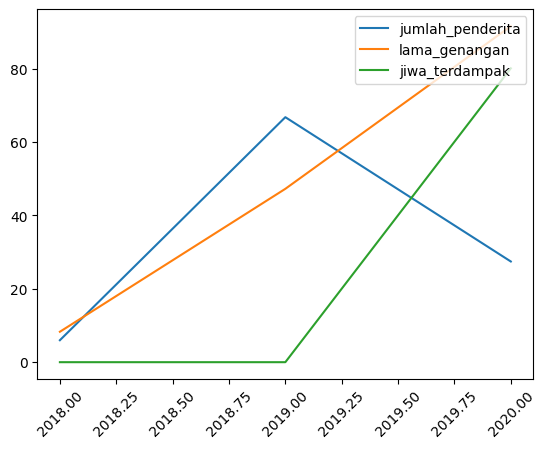

In [ ]:
tahun = [2018, 2019, 2020]

print("Hubungan antara jumlah_penderita dan lama_genangan")
plt.plot(tahun, df_penyakit_norm.groupby("tahun")["jumlah_penderita"].sum(), label = "jumlah_penderita")
plt.plot(tahun, df_penyakit_norm.groupby("tahun")["lama_genangan"].sum(), label = "lama_genangan")
plt.plot(tahun, df_penyakit_norm.groupby("tahun")["jiwa_terdampak"].sum(), label = "jiwa_terdampak")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.show()

# **Kesimpulan dan Rekomendasi**
Dari analisis data yang telah dilakukan dapat disimpulkan beberapa hal sebagai berikut.

1.   Pola banjir di DKI Jakarta pada tahun 2015-2020 mengalami peningkatan.
2.   Pola jumlah kecamatan dan kelurahan yang terdampak banjir tidak memiliki pengaruh yang kuat terhadap jumlah jiwa penduduk yang terdampak banjir.
3.   Pola banjir di DKI Jakarta berhubungan kuat dengan pola curah hujan, sehingga tidak dapat diprediksi oleh pola curah hujan.
4.   Pola banjir memiliki pengaruh yang kuat terhadap pola penyebaran penyakit menular di DKI Jakarta.
5.   Jumlah kecamatan dan kelurahan serta penduduk yang terdampak banjir tiap bulan maupun tahun dapat diprediksi melalui model regresi yang disesuai terhadap pola banjir.
6.   Jumlah kecamatan dan kelurahan yang terdampak banjir tahun 2015-2020 yang tertinggi pada tahun 2016, dan yang terendah berada pada tahun 2015.
7.   Jumlah kecamatan dan kelurahan terdampak banjir tahun 2015-2020 yang tertinggi bulan November, dan yang terendah berada pada bulan Maret.
8.   Jumlah penduduk terdampak banjir tahun 2015-2020 paling banyak terdapat pada tahun 2016, dan yang paling sedikit tahun 2018-2019.
9.   Jumlah penduduk terdampak banjir tahun 2015-2020 paling banyak terdapat pada bulan Agustus, dan yang paling sedikit pada bulan Maret.

Selain itu, berikut adalah beberapa langkah rekomendasi dari analisis data yang telah dilakukan.

1.   Mengadakan antisipasi evakuasi banjir terhadap sesuai dengan prediksi jumlah kecamatan-kelurahan serta jumlah penduduk yang diprediksi model
2.   Meningkatkan kuantitas dan kualitas fasilitas kesehatan dalam menangani penyakit yang muncul saat banjir


